# Content

1. Environment Setup  

2. Exploratory Data Analysis

3. Feature Engineering

4. Data Preprocessing & Feature Selection

5. Model Design

6. Evaluating Performance

7. Conclusions


## **1.** Environment Setup
Import libraries and read data.

In [1]:
# Data
import pandas as pd
import numpy as np

# Statistical tests
import scipy

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Geography
import pycountry_convert as pc

# Missing data
import missingno

# For explainability
from lime import lime_tabular

# Sklearn
import sklearn as sk

from sklearn import preprocessing, feature_selection, model_selection
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             f1_score, recall_score, precision_score, roc_auc_score,
                             roc_curve, auc, precision_recall_curve)

# Deepcopy of models
from copy import deepcopy

# Utilities
import utilities as utl

In [2]:
# Read the data into a pandas DataFrame
df = pd.read_csv('Ad Click Data.csv')

# Take a look into the data
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


## 2. Exploratory Data Analysis

In [3]:
# Structure & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [4]:
# Description of the non-object features
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # 2 decimal digits
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.00,1000.00,987.00,989.00,997.00,1000.00
mean,64.93,36.01,54980.67,179.86,0.48,0.50
std,15.84,8.79,13440.00,43.87,0.50,0.50
min,32.60,19.00,13996.50,104.78,0.00,0.00
25%,51.27,29.00,46947.57,138.71,0.00,0.00
50%,68.11,35.00,57009.76,182.65,0.00,0.50
75%,78.46,42.00,65479.35,218.79,1.00,1.00
max,91.43,61.00,79484.80,267.01,1.00,1.00


###  Visualizing columns type and missing data.

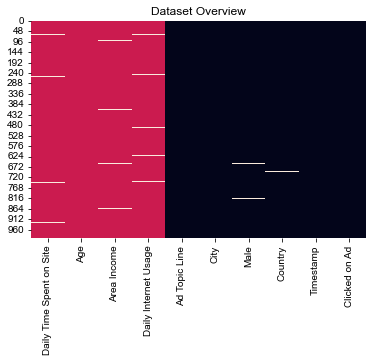

 Categorical   Numeric   NaN 


In [5]:
utl.missing_data_and_types(df)

<AxesSubplot:>

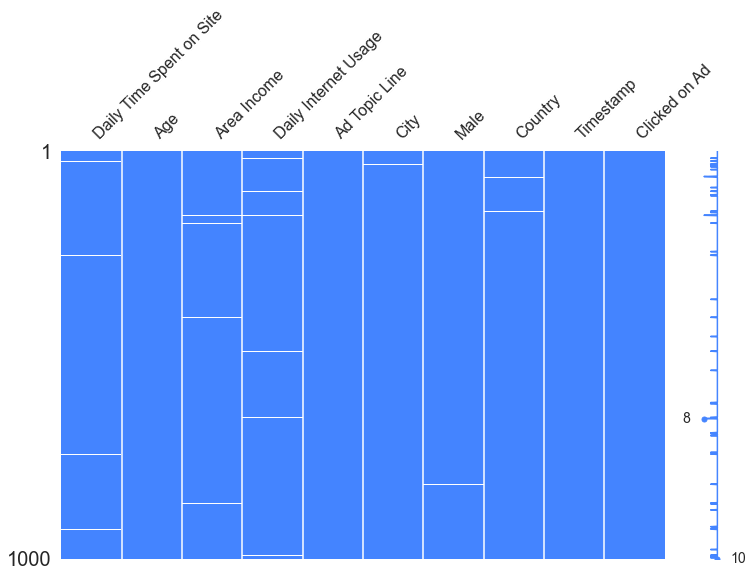

In [6]:
# Alternative visualization of missing data with missingno library
missingno.matrix(df, color=(0.27, 0.52, 1.0), figsize=(12,7.5))

### Proportion of Missing Values

In [7]:
utl.missing_values_table(df)

The dataset has total 10 columns. 
There are 6 columns that have missing values.




,missing values,% of missing values
Daily Time Spent on Site,13,1.30
Area Income,13,1.30
Daily Internet Usage,11,1.10
Country,9,0.90
Male,3,0.30
City,1,0.10


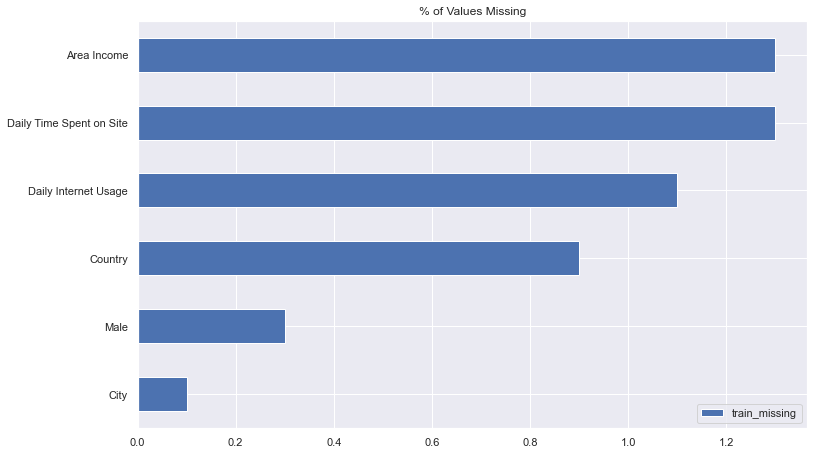

In [8]:
utl.missing_values_percentages(df)

### Plot the appropriate visualizations for each data type.

### Numeric Features

**Plotting pairplots of numeric columns.**

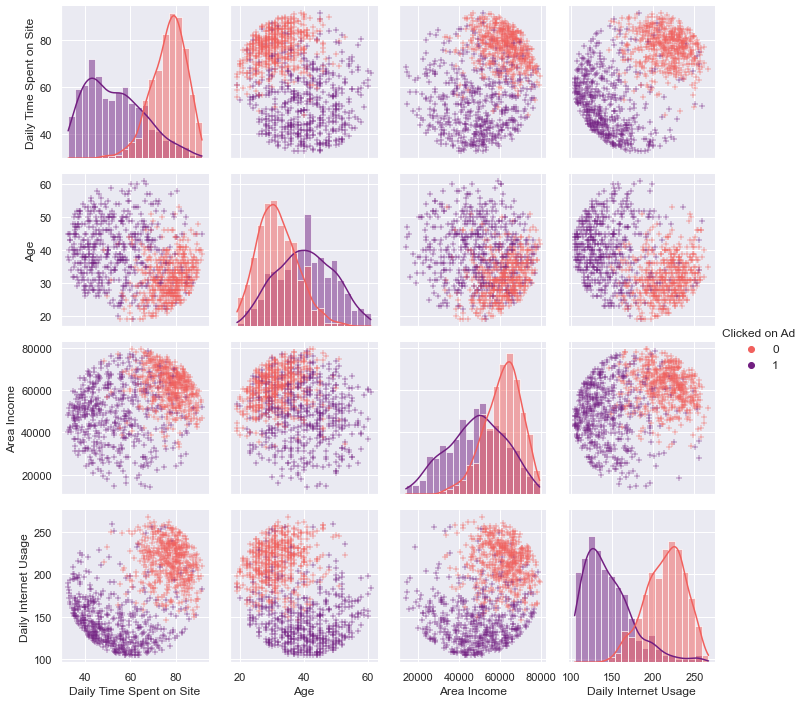

In [9]:
# Creates a subplot grid, for plotting pairwise relationships of the dataset. More flexible than '.pairplot()'
g = sns.PairGrid(data=df, vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], hue = 'Clicked on Ad', palette = 'magma_r')
# Diagonal
g.map_diag(sns.histplot, bins = 20, kde = True)
# Upper part
g.map_upper(sns.scatterplot, marker='+')
# Lower part
g.map_lower(sns.scatterplot, marker='+')
# Add legend
g.add_legend(fontsize=12, bbox_to_anchor=(1,0.5))

**Plot and compare the box plots of the two labels to spot different behaviors of the outliers.**

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

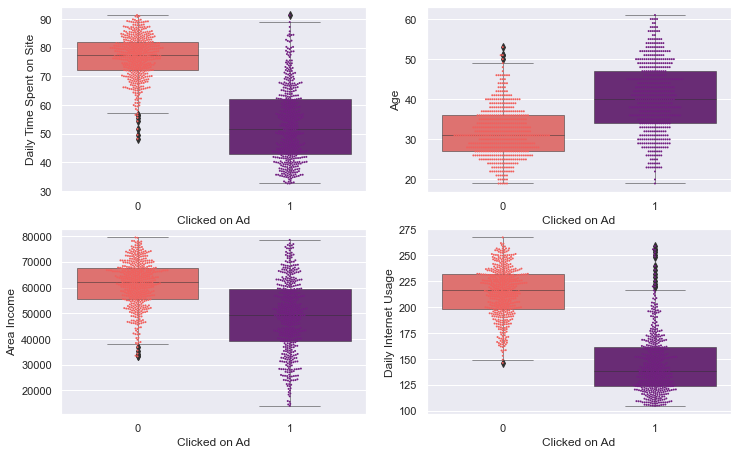

In [10]:
# Creates 2x2 subplot
fig, axs = plt.subplots(2,2)

# Top-left [0,0]
sns.boxplot(x=df['Clicked on Ad'], y=df['Daily Time Spent on Site'], ax=axs[0,0], linewidth=0.5, palette = 'magma_r')
sns.swarmplot(x=df['Clicked on Ad'], y=df['Daily Time Spent on Site'], ax=axs[0,0], size=2, palette = 'magma_r')

# Top-right [0,1]
sns.boxplot(x=df['Clicked on Ad'], y=df['Age'], ax=axs[0,1], linewidth=0.5, palette = 'magma_r')
sns.swarmplot(x=df['Clicked on Ad'], y=df['Age'], ax=axs[0,1], size=2, palette = 'magma_r')

# Bottom-left [1,0]
sns.boxplot(x=df['Clicked on Ad'], y=df['Area Income'], ax=axs[1,0], linewidth=0.5, palette = 'magma_r')
sns.swarmplot(x=df['Clicked on Ad'], y=df['Area Income'], ax=axs[1,0], size=2, palette = 'magma_r')

# Bottom-right [1,1]
sns.boxplot(x=df['Clicked on Ad'], y=df['Daily Internet Usage'], ax=axs[1,1], linewidth=0.5, palette = 'magma_r')
sns.swarmplot(x=df['Clicked on Ad'], y=df['Daily Internet Usage'], ax=axs[1,1], size=2, palette = 'magma_r')

### Categorical Features

Now, we analyze the behavior of the Categorical variables with respect to the target value.

For each categorical variable, we will plot **2 bar plots**, one with the amount of 1s and 0s among the different categories, and the other with the percentages.

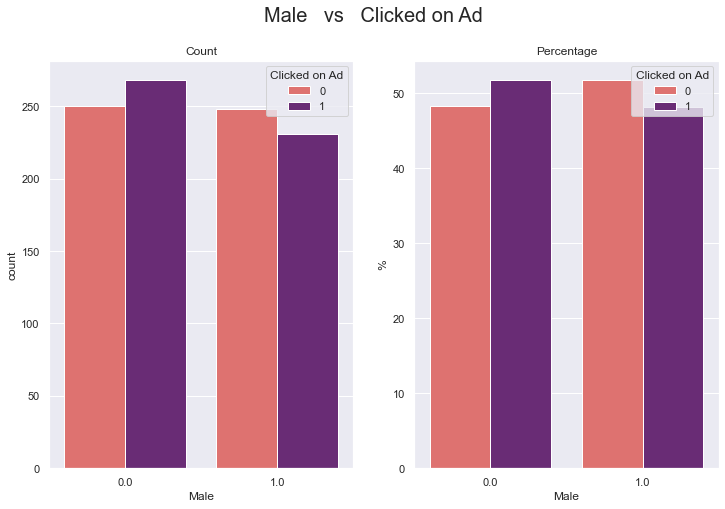

In [11]:
utl.graph_cat_vs_label(category_column='Male', label_column='Clicked on Ad', data=df)

# 3. Feature Engineering

### Country vs Label

In [12]:
# Replacing missing 'Country' data with mode
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

In [13]:
# Split 'Country' into 'Continent' bins
df['Continent'] = utl.country_list_to_continent(df['Country'])

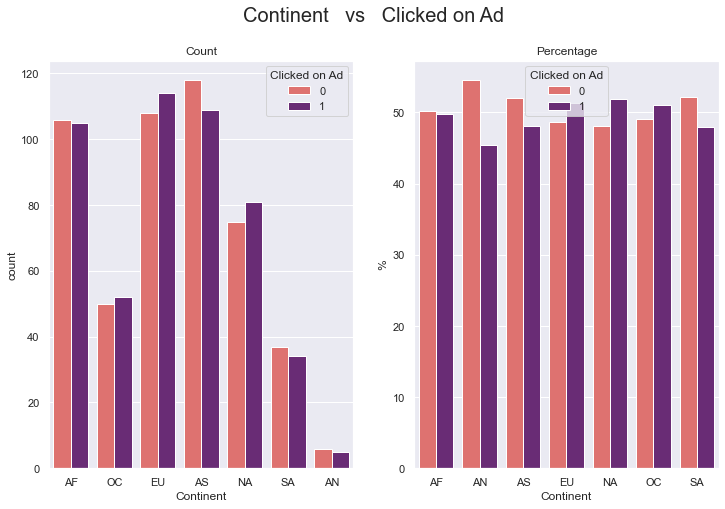

In [14]:
utl.graph_cat_vs_label(category_column='Continent', label_column='Clicked on Ad', data=df)

### Time vs Label

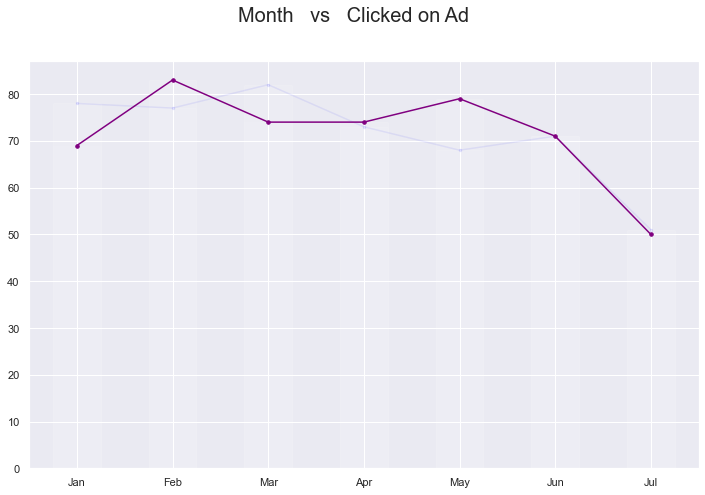

In [15]:
utl.graph_time_vs_label(period='Month', timestamp_column='Timestamp', label_column='Clicked on Ad', data=df)

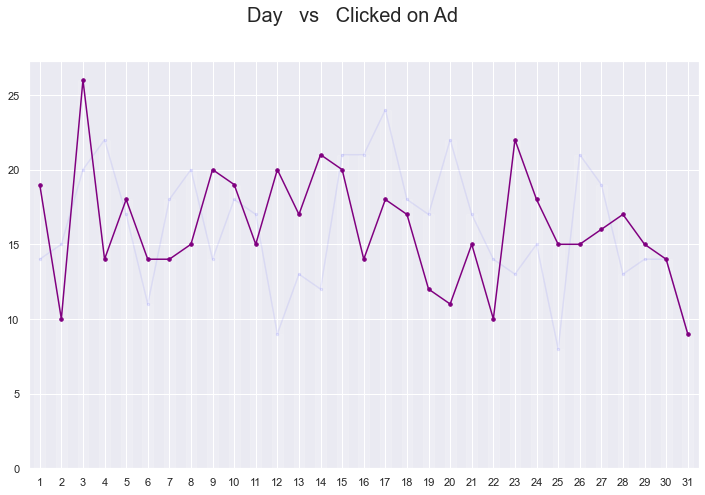

In [16]:
utl.graph_time_vs_label(period='Day', timestamp_column='Timestamp', label_column='Clicked on Ad', data=df)

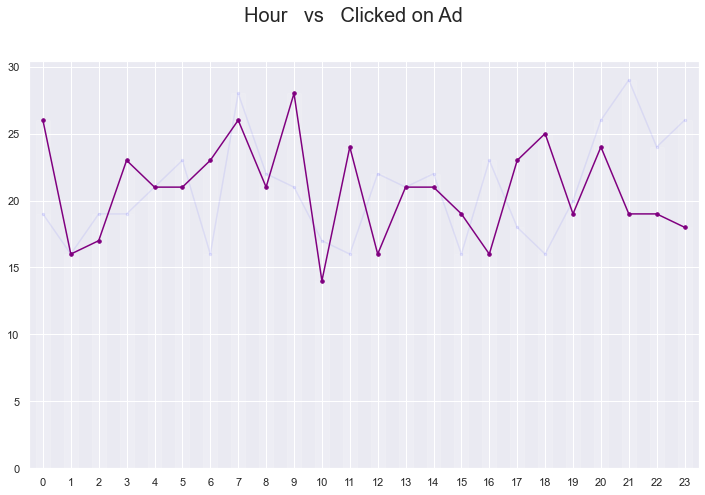

In [17]:
utl.graph_time_vs_label(period='Hour', timestamp_column='Timestamp', label_column='Clicked on Ad', data=df)

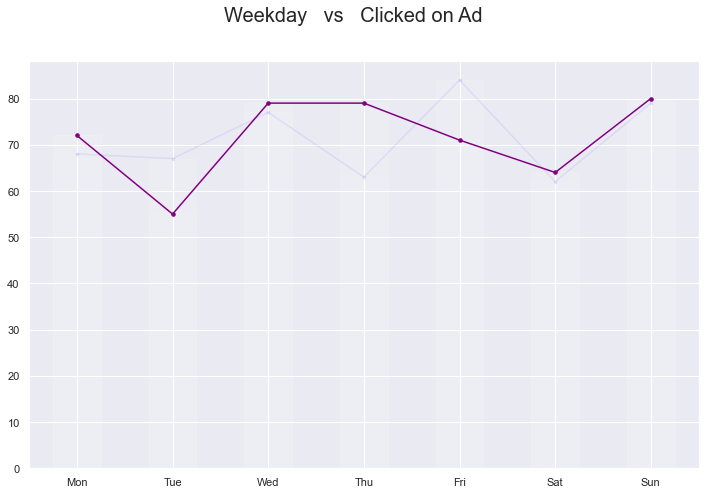

In [18]:
utl.graph_time_vs_label(period='Weekday', timestamp_column='Timestamp', label_column='Clicked on Ad', data=df)

In [19]:
# Take a look into the df with the new feature columns
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Continent,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.00,Tunisia,2016-03-27 00:53:00,0,AF,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.00,Nauru,2016-04-04 01:39:00,0,OC,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.00,San Marino,2016-03-13 20:35:00,0,EU,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.00,Italy,2016-01-10 02:31:00,0,EU,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.00,Iceland,2016-06-03 03:36:00,0,EU,6,3,3,4


### Feature Pre-Selection

In [20]:
# Get rid of columns Timestamp, Country, City & Ad Topic Line
df = df.loc[:, ~df.columns.isin(['Ad Topic Line', 'City', 'Country', 'Timestamp'])]
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Continent,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,0.00,0,AF,3,27,0,6
1,80.23,31,68441.85,193.77,1.00,0,OC,4,4,1,0
2,69.47,26,59785.94,236.50,0.00,0,EU,3,13,20,6
3,74.15,29,54806.18,245.89,1.00,0,EU,1,10,2,6
4,68.37,35,73889.99,225.58,0.00,0,EU,6,3,3,4


### Label Encoding

In [21]:
# Convert categorical variable into dummy/indicator variables
dummy = pd.get_dummies(df['Continent'], prefix='Continent',drop_first=True)

df= pd.concat([df, dummy], axis=1)
print( df.filter(like='Continent', axis=1).head() )

# Drop the original categorical column
df = df.drop('Continent', axis=1)

  Continent  Continent_AN  Continent_AS  Continent_EU  Continent_NA  \
0        AF             0             0             0             0   
1        OC             0             0             0             0   
2        EU             0             0             1             0   
3        EU             0             0             1             0   
4        EU             0             0             1             0   

   Continent_OC  Continent_SA  
0             0             0  
1             1             0  
2             0             0  
3             0             0  
4             0             0  


In [22]:
# Dataframe correctly processed to be used by ML algorithms
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Weekday,Continent_AN,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
0,68.95,35,61833.90,256.09,0.00,0,3,27,0,6,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1.00,0,4,4,1,0,0,0,0,0,1,0
2,69.47,26,59785.94,236.50,0.00,0,3,13,20,6,0,0,1,0,0,0
3,74.15,29,54806.18,245.89,1.00,0,1,10,2,6,0,0,1,0,0,0
4,68.37,35,73889.99,225.58,0.00,0,6,3,3,4,0,0,1,0,0,0


# 4. Data Preprocessing

### Splitting Data into Training, Validation & Test sets
Since our data set has n < 10,000 observations, we will use a 70:30 split.

In [23]:
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

### Train/Test split

In [24]:
# Split into Training and Testing sets
X_train_0, X_test, y_train_0, y_test = model_selection.train_test_split(X, y, test_size=0.3, shuffle = True, random_state=0)

In [25]:
# Train/Test split Summary
print('X_train_0 shape:', X_train_0.shape, '| X_test shape:', X_test.shape)
print('y_train_0 mean:', round(np.mean(y_train_0), 2), '| y_test mean:', round(np.mean(y_test), 2), '\n')
print(X_train_0.shape[1], 'features:', X_train_0.columns.to_list())

X_train_0 shape: (700, 15) | X_test shape: (300, 15)
y_train_0 mean: 0.52 | y_test mean: 0.45 

15 features: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Month', 'Day', 'Hour', 'Weekday', 'Continent_AN', 'Continent_AS', 'Continent_EU', 'Continent_NA', 'Continent_OC', 'Continent_SA']


### Train/Validation split

In [26]:
# Split into Training and Validation sets
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_0, y_train_0, test_size=0.3, shuffle = True, random_state=0)

In [27]:
# Train/Validation split Summary
print('X_train shape:', X_train.shape, '| X_val shape:', X_val.shape)
print('y_train mean:', round(np.mean(y_train), 2), '| y_val mean:', round(np.mean(y_val), 2))

X_train shape: (490, 15) | X_val shape: (210, 15)
y_train mean: 0.53 | y_val mean: 0.5


### Handling Missing Data

In [28]:
# Replacing missing values of feature spaces
for d in [X_train_0, X_train, X_val, X_test]:
    # Fill missing numerical values with the respective mean
    d['Daily Time Spent on Site'] = d['Daily Time Spent on Site'].fillna(d['Daily Time Spent on Site'].mean())
    d['Area Income'] = d['Area Income'].fillna(d['Area Income'].mean())
    d['Daily Internet Usage'] = d['Daily Internet Usage'].fillna(d['Daily Internet Usage'].mean())
    # Fill missing categorical values with the respective mode
    d['Male'] = d['Male'].fillna(d['Male'].mode()[0])

# Replacing missing values of labels
for d in [y_train_0, y_train, y_val, y_test]:
    d = d.fillna(d.mode()[0])

### Normalize Data

In [29]:
def scaled_values(df):
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    sc = scaler.fit_transform(df)
    return pd.DataFrame(sc, columns=df.columns, index=df.index)

In [30]:
X_train_0_sc = scaled_values(X_train_0)
X_train_sc = scaled_values(X_train)
X_val_sc = scaled_values(X_val)
X_test_sc = scaled_values(X_test)

# Feature Selection

Feature selection is the process of selecting a subset of relevant variables to build the machine learning model. It makes the model easier to interpret and reduces overfitting (when the model adapts too much to the training data and performs badly outside the train set). We can make use of:

*Correlation Matrix  
*Statistical tests to find the most relevant (predictive) features.  

### Correlation Matrix

Text(0.5, 1.0, 'Pearson correlation')

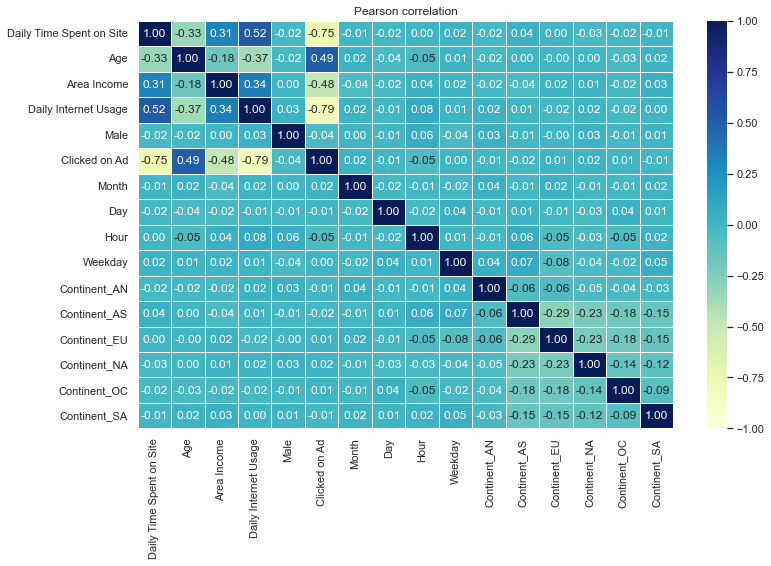

In [31]:
corr_matrix = df.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == 'O':
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method='pearson')

sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title('Pearson correlation')

### Automatic Feature Selection

Two different ways to perform automatic feature selection: first we will use a regularization method and compare it to the ANOVA test, then we will get feature importance from an ensemble method (Random Forest Classifier).

### Lasso/Anova - features importance

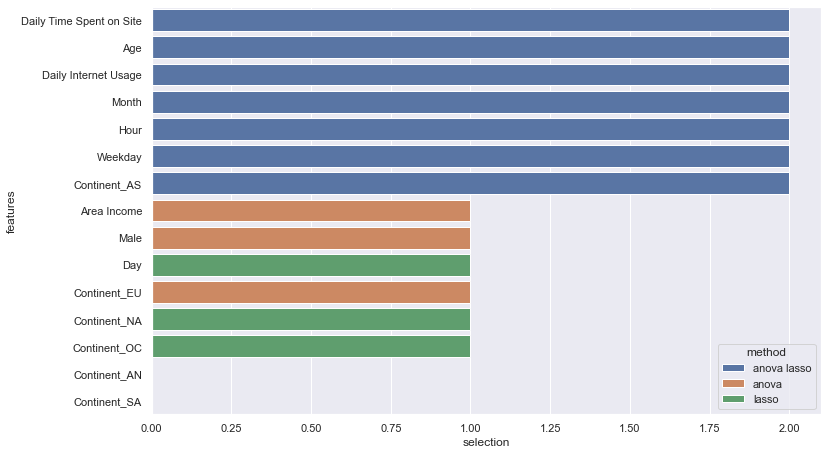

In [32]:
utl.lasso_anova_features_importance(X_train_0,y_train_0)

### Random Forest - features importance

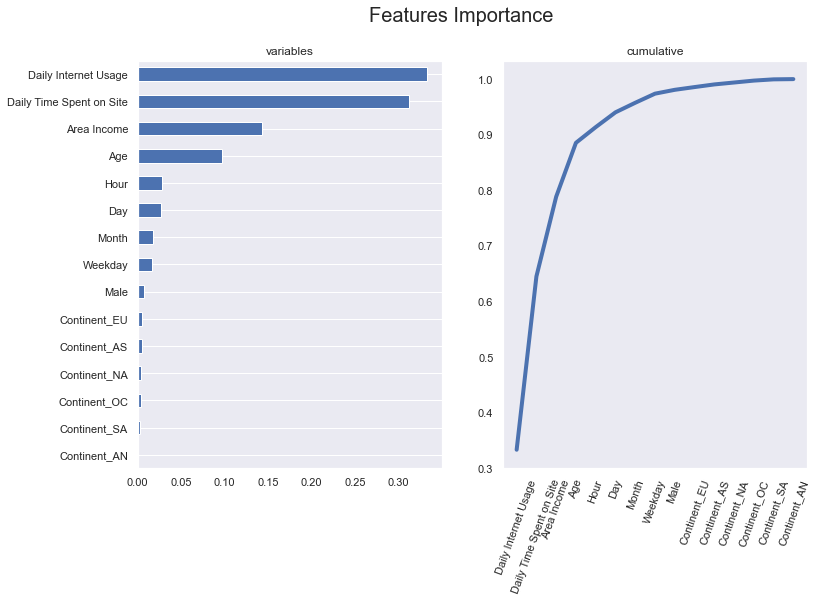

In [33]:
utl.random_forest_features_importance(X_train_0, y_train_0)

### Features Selected

In [34]:
def selected_features(X):
    return X.loc[:, ~X.columns.isin(['Continent_AN', 'Continent_OC', 'Continent_SA'])]

In [35]:
X_train_0 = selected_features(X_train_0)
X_train_0_sc = selected_features(X_train_0_sc)
X_train = selected_features(X_train)
X_train_sc = selected_features(X_train_sc)
X_val = selected_features(X_val)
X_val_sc = selected_features(X_val_sc)
X_test = selected_features(X_test)
X_test_sc = selected_features(X_test_sc)

# 5. Model Design

### Testing models with default parameters

In [36]:
def get_scores(model, X, y, X_val, y_val):
    model.fit(X, y)
    predictions = model.predict(X_val)
    
    # Confusion matrix
    cf_matrix = confusion_matrix(y_val, predictions)
    print('\nConfusion Matrix:')
    print(cf_matrix, '\n')
    
    # Classification report
    print(classification_report(y_val, predictions))

### Logistic Regression

In [37]:
get_scores(LogisticRegression(), X_train_sc.values, y_train.values, X_val_sc.values, y_val.values)


Confusion Matrix:
[[105   1]
 [  4 100]] 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       106
           1       0.99      0.96      0.98       104

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



### Gradient Boosting Classifier

In [38]:
get_scores(GradientBoostingClassifier(), X_train_sc.values, y_train.values, X_val_sc.values, y_val.values)


Confusion Matrix:
[[103   3]
 [  5  99]] 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.97      0.95      0.96       104

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



### Decision Tree Classifier

In [39]:
get_scores(DecisionTreeClassifier(), X_train_sc.values, y_train.values, X_val_sc.values, y_val.values)


Confusion Matrix:
[[98  8]
 [ 7 97]] 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       106
           1       0.92      0.93      0.93       104

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210



## Hyperparameter Tunning

We select the two best performing models for hyperparameter tuning.

### Gradient Boosting Classifier

**Randomized Search Cross Validation**

In [40]:
# Call model
model = GradientBoostingClassifier()

# Define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005],  # weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000],  # number of trees added to the model
'max_depth':[2,3,4,5,6,7],  # maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20],  # sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7],  # the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],  # square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}  # the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

# Randomized Search Cross Validation
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=40, 
       scoring='f1', random_state=0).fit(X_train_sc.values, y_train.values)

In [41]:
# Summarize
cv_results = pd.DataFrame(random_search.cv_results_)
cv_results.sort_values(by=['rank_test_score'], inplace=True)
cv_results.set_index('rank_test_score', inplace=True)

# Top results
for i in range(1,10+1):
    mean = cv_results['mean_test_score'][i]
    param = cv_results['params'][i]
    stds = cv_results['std_test_score'][i]
    print(f'rank {i} | mean_test_score {mean} | std ({stds})')
    print(param, '\n')

rank 1 | mean_test_score 0.9711341086098366 | std (0.016068284681779205)
{'subsample': 0.75, 'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 2, 'learning_rate': 0.005} 

rank 2 | mean_test_score 0.9653451402965967 | std (0.007899020037888144)
{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 4, 'learning_rate': 0.01} 

rank 3 | mean_test_score 0.9639488355058802 | std (0.015253735580978625)
{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 7, 'learning_rate': 0.01} 

rank 4 | mean_test_score 0.9635506643933096 | std (0.012704920970213196)
{'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 4, 'max_depth': 7, 'learning_rate': 0.005} 

rank 5 | mean_test_score 0.9616078499262233 | std (0.016360729072929136)
{'subsample': 0.8, 'n_estimators': 750, 

In [42]:
GBC_model = random_search.best_estimator_

**Stratified K-fold cross validation**

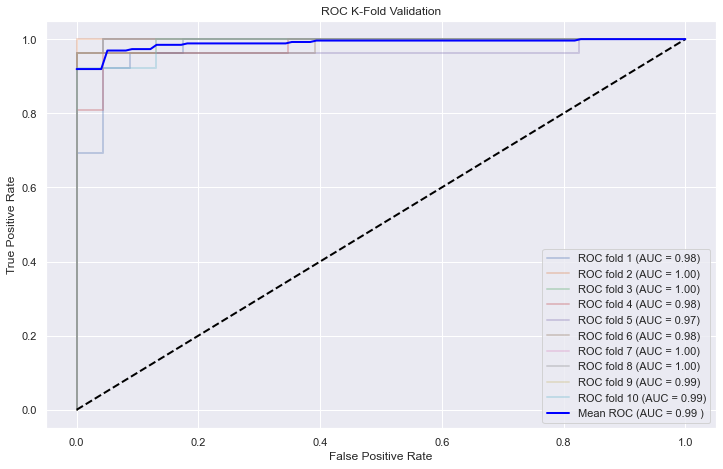

In [43]:
utl.ROC_curves_KfoldCV(X_train_sc.values, y_train.values, model=GBC_model, num_splits=10)

### Logistic Regression  

**Grid Search Cross Validation**

In [44]:
# Define hyperparameters combinations to try
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = model_selection.GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train_sc.values, y_train.values)

In [45]:
# Summarize results
print("\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_), '\n')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.968992 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'} 

0.968992 (0.020672) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.968992 (0.020672) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.966929 (0.022917) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.966225 (0.023909) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966225 (0.023909) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965874 (0.027375) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.966537 (0.028189) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966537 (0.028189) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.949771 (0.029902) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.957338 (0.029540) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.957338 (0.029540) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.940897 (0.035248) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.939239 (0.024171) 

In [46]:
LR_model = grid_search.best_estimator_

**Stratified K-fold cross validation**

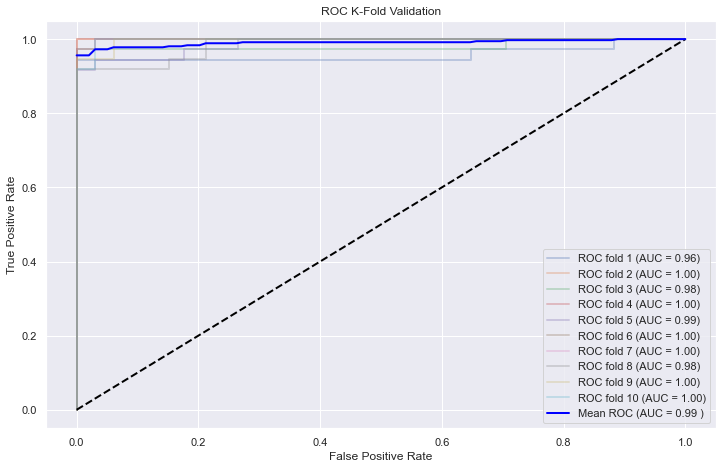

In [47]:
utl.ROC_curves_KfoldCV(X_train_0_sc.values, y_train_0.values, model=LR_model, num_splits=10)

# 6. Evaluation

Once that the right model is selected, it can be trained on the whole train set and then tested on the test set.

In [48]:
# Train
GBC_model.fit(X_train_0.values, y_train_0.values)

# Test
predicted_prob = GBC_model.predict_proba(X_test.values)[:,1]
predicted = GBC_model.predict(X_test.values)


AUC: 0.99
Accuracy (overall correct predictions): 0.95
Recall (all 1s predicted right): 0.95
Precision (confidence when predicting a 1): 0.93 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       164
           1       0.93      0.95      0.94       136

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



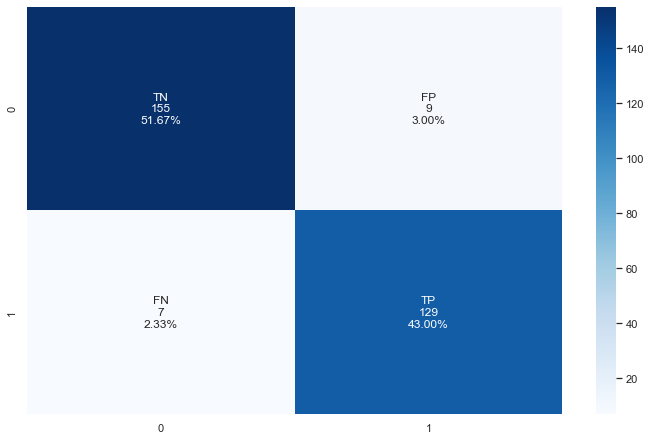

In [49]:
# Accuray and AUC
auc = roc_auc_score(y_test.values, predicted_prob)
accuracy = accuracy_score(y_test.values, predicted)
print("\nAUC:", round(auc,2))
print("Accuracy (overall correct predictions):",  round(accuracy,2))

# Precision and Recall
recall = recall_score(y_test.values, predicted)
precision = precision_score(y_test.values, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2), '\n')

# Classification report
print(classification_report(y_test.values, predicted))

# Confusion matrix
cf_matrix = confusion_matrix(y_test.values, predicted)
utl.plot_confusion_matrix(cf_matrix)

### Comparison with baseline model

In [50]:
# Baseline model
# Train
LR_model.fit(X_train_0_sc.values, y_train_0.values)

# Test
predicted_prob_LR = LR_model.predict_proba(X_test_sc.values)[:,1]
predicted_LR = LR_model.predict(X_test_sc.values)

# Confusion matrix
cf_matrix_baseline = confusion_matrix(y_test.values, predicted_LR)
print('\nConfusion Matrix:')
print(cf_matrix_baseline, '\n')

# Classification report
print(classification_report(y_test.values, predicted_LR))


Confusion Matrix:
[[149  15]
 [  3 133]] 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       164
           1       0.90      0.98      0.94       136

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### ROC & Precision-Recall curves

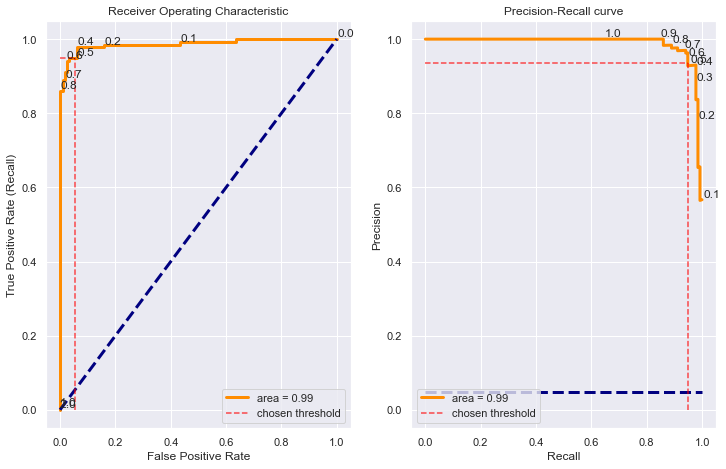

In [51]:
cm = cf_matrix
classes = np.unique(y_test.values)
fig, ax = plt.subplots(nrows=1, ncols=2)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test.values, predicted_prob)
roc_auc = sk.metrics.auc(fpr, tpr)     
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver Operating Characteristic")     
ax[0].legend(loc="lower right")
ax[0].grid(True)

# Annotate ROC thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
     t = np.round(t,1)
     if t not in thres_in_plot:
         ax[0].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]), 
              textcoords='offset points', ha='left', va='bottom')
         thres_in_plot.append(t)
     else:
         next
            
# Plot P-R curve
precisions, recalls, thresholds = precision_recall_curve(y_test.values, predicted_prob)
roc_auc = sk.metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test.values), (cm[1,0]+cm[1,0])/len(y_test.values)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)

# Annotate P-R thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
         ax[1].annotate(np.round(t,1), xy=(recalls[i],precisions[i]), 
               xytext=(recalls[i],precisions[i]), 
               textcoords='offset points', ha='left', va='bottom')
         thres_in_plot.append(t)
    else:
         next
plt.show()

### F1-score for different thresholds

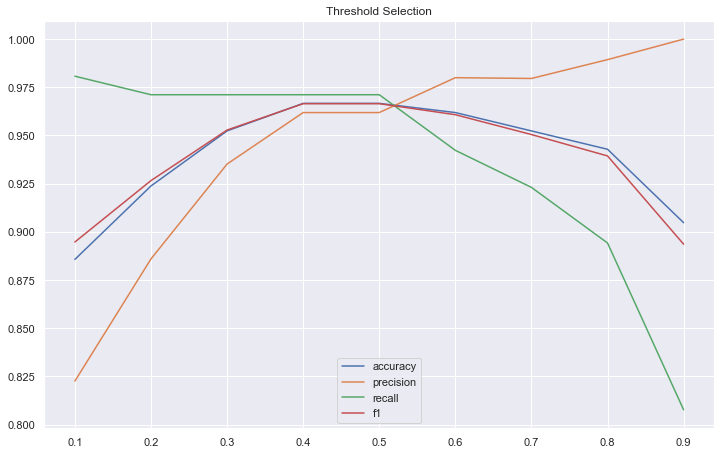

In [52]:
GBC_model_aux = deepcopy(GBC_model)

# Calculate scores for different thresholds
dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train_0_sc.values, y_train_0.values, test_size=0.3, random_state=0)
predicted_prob_aux = GBC_model_aux.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]

thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted_aux = (predicted_prob_aux > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(accuracy_score(yy_test, predicted_aux))
    dic_scores["precision"].append(precision_score(yy_test, predicted_aux))
    dic_scores["recall"].append(recall_score(yy_test, predicted_aux))
    dic_scores["f1"].append(f1_score(yy_test, predicted_aux))
        
# Plot
df_scores = pd.DataFrame(dic_scores, index=thresholds)
df_scores.plot(title="Threshold Selection")
plt.show()

# 7. Conclusions

## Explainability

We analyzed and understood the data, we trained a model and tested it, we are even satisfied with the performance. But we are not done, we have to show that our machine learning model is not a black box.

The Lime package can help us to build an explainer. To give an illustration, we can take a random observation from the test set and see what the model predicts:

In [53]:
print("True label:", y_test.values[5], "--> Predicted:", predicted[5], "| Probability:", np.max(predicted_prob[5]))

True label: 1 --> Predicted: 1 | Probability: 0.988109182107525


The model thinks this observation is a 1 with a probability of 0.98, and in fact this is the case. Why? Let’s use the explainer:

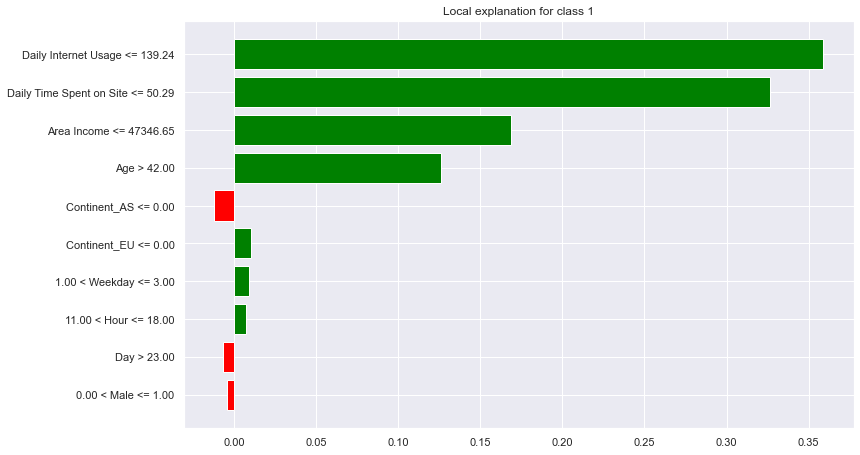

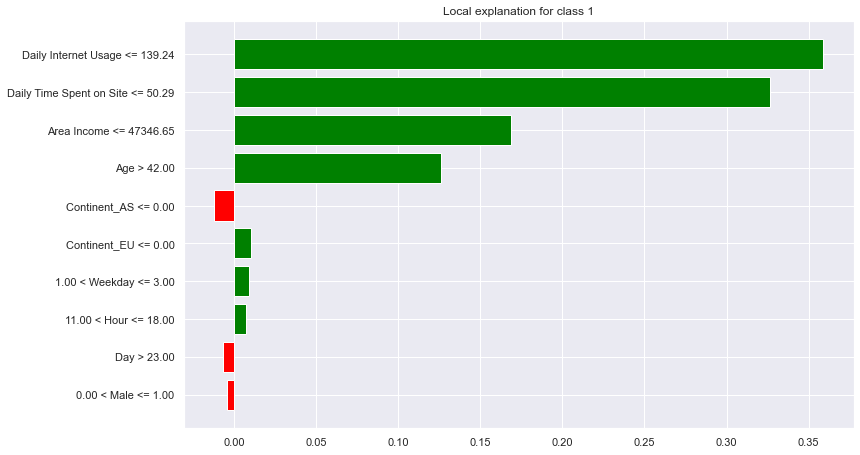

In [54]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train_0.values, feature_names=X_train_0.columns,
                                              class_names=np.unique(y_train_0), mode='classification')
explained = explainer.explain_instance(X_test.values[5], GBC_model.predict_proba, num_features=10)
explained.as_pyplot_figure()

The main factors for this particular prediction are:  
1. the user doesn't spend a great amount of time on the internet (Daily Internet Usage <= 139.24),  
2. the user doesn't spend a lot of time on the website (Daily Time Spent on Site <= 50.29),  
2. the user accesses from a country belonging to the first quartile by income (Area Income <= 47,346.65),  
3. the user is at least 42 years old (Age > 42).

**The Gradient Boosting Decision Tree model showed a slightly better performance in comparison to the Logistic Regression model. Still, Logistic Regression offers faster predictions, scales well to larger datasets and is easier to interpret.**